# Sentiment Analysis from TWEETS

# **Dataset Description**

## **Dataset Link**



https://www.kaggle.com/datasets/ankitkumar2635/sentiment-and-emotions-of-tweets

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankitkumar2635/sentiment-and-emotions-of-tweets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sentiment-and-emotions-of-tweets' dataset.
Path to dataset files: /kaggle/input/sentiment-and-emotions-of-tweets


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/kaggle/input/sentiment-and-emotions-of-tweets/sentiment-emotion-labelled_Dell_tweets.csv')
df.head(5)

,Unnamed: 0,Datetime,Tweet Id,Text,Username,sentiment,sentiment_score,emotion,emotion_score
0,0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,neutral,0.853283,anticipation,0.587121
1,1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,neutral,0.519470,joy,0.886913
2,2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,positive,0.763791,joy,0.960347
3,3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,negative,0.954023,anger,0.983203
4,4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,neutral,0.529170,anger,0.776124


In [ ]:
df.columns

Index(['Unnamed: 0', 'Datetime', 'Tweet Id', 'Text', 'Username', 'sentiment',
       'sentiment_score', 'emotion', 'emotion_score'],
      dtype='object')

## Keeping only necessary columns

In [ ]:
df_tweets = df[['Text', 'sentiment', 'emotion']]

df_tweets.columns = ['text', 'sentiment', 'emotion']
df_tweets.head(5)

,text,sentiment,emotion
0,@Logitech @apple @Google @Microsoft @Dell @Len...,neutral,anticipation
1,@MK_habit_addict @official_stier @MortalKombat...,neutral,joy
2,"As @CRN celebrates its 40th anniversary, Bob F...",positive,joy
3,@dell your customer service is horrible especi...,negative,anger
4,@zacokalo @Dell @DellCares @Dell give the man ...,neutral,anger


In [ ]:
df_tweets.shape

(24970, 3)

## Checking balance

In [ ]:
df_tweets.sentiment.value_counts()

,count
sentiment,
negative,10556
positive,7366
neutral,7048


## NULL value check

In [ ]:
df_tweets.isnull().sum()

,0
text,0
sentiment,0
emotion,0


# **Exploratory Data Analysis (EDA)**

## Visualization of Sentiments

<Axes: title={'center': 'Count of Sentiments'}, xlabel='sentiment'>

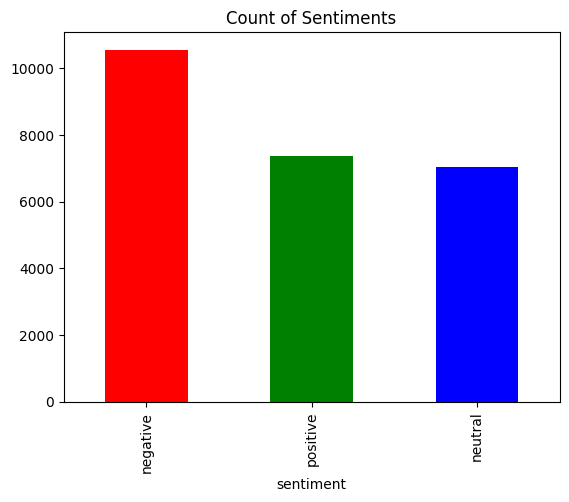

In [ ]:
color_dict = {'negative':'red', 'positive':'green', 'neutral':'blue'}
colors = [color_dict[label] for label in df_tweets.sentiment.value_counts().index]

sentiment_count = df_tweets.sentiment.value_counts()
sentiment_count.plot(kind='bar', title = 'Count of Sentiments', color=colors)


## **Visualization of emotion in different sentiments**

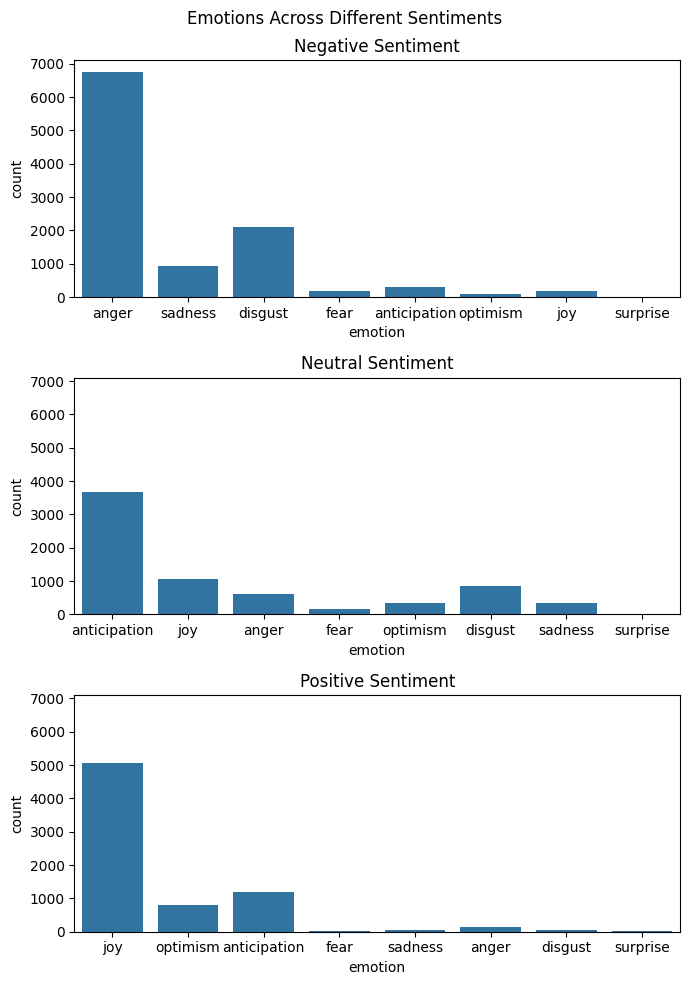

In [ ]:

fig, axes = plt.subplots(3,1, figsize = (7,10), sharey = True)


plt.suptitle('Emotions Across Different Sentiments')

#Counting emotions by negative sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'negative'], x='emotion', ax= axes[0])
axes[0].title.set_text('Negative Sentiment')

#Counting emotions by neutral sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'neutral'], x='emotion', ax= axes[1])
axes[1].title.set_text('Neutral Sentiment')

#Counting emotions by positive sentiment
sns.countplot(data=df_tweets.loc[df_tweets.sentiment == 'positive'], x='emotion', ax= axes[2])
axes[2].title.set_text('Positive Sentiment')

#Adjusting layout
plt.tight_layout()


# **Data Preprocessing**

In [ ]:
import tensorflow as tf
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download("stopwords")

nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Flatten, Input,SimpleRNN,LSTM,Dropout,Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam

## Removal of stopwords

In [ ]:
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

# Ensure punkt tokenizer is downloaded for word_tokenize
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    nltk.download('punkt_tab')

stop_words = set(stopwords.words('english')) # Convert to set for faster lookup

def remove_stopwords_from_text(text):
    word_tokens = word_tokenize(text)
    # Filter out words that are in the stop_words set
    filtered_words = [w for w in word_tokens if w.lower() not in stop_words]
    return " ".join(filtered_words)

df_tweets['text'] = df_tweets['text'].str.lower()
df_tweets['text'] = df_tweets['text'].apply(remove_stopwords_from_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/tmp/ipython-input-1527160858.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].str.lower()
/tmp/ipython-input-1527160858.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(remove_stopwords_from_text)


## Puntuation Removal using RegEx

In [ ]:
import re
import string

def remove_punctuation_regex(text):
    pattern = f"[{re.escape(string.punctuation)}]"

    return re.sub(pattern, "", text)


df_tweets['text'] = df_tweets['text'].apply(remove_punctuation_regex)

print(df_tweets['text'].head())


0     logitech  apple  google  microsoft  dell  len...
1     mkhabitaddict  officialstier  mortalkombat  n...
2     crn celebrates 40th anniversary  bob faletra ...
3     dell customer service horrible especially age...
4       zacokalo  dell  dellcares  dell give man paid 
Name: text, dtype: object


/tmp/ipython-input-2321360814.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweets['text'] = df_tweets['text'].apply(remove_punctuation_regex)


# **Model Implementation**

In [ ]:
df_tweets.drop('emotion',axis = 1) #droppint the 'emotion' column as we think it is reduntant for model training

,text,sentiment
0,logitech apple google microsoft dell len...,neutral
1,mkhabitaddict officialstier mortalkombat n...,neutral
2,crn celebrates 40th anniversary bob faletra ...,positive
3,dell customer service horrible especially age...,negative
4,zacokalo dell dellcares dell give man paid,neutral
...,...,...
24965,eldarkangel2 gamersnexus dell would nt even...,negative
24966,kitereal gamersnexus dell nt really leave e...,positive
24967,hey joshthefixer 27 4k uhd usbc dell https ...,neutral
24968,bravadogaming thewolfpena alienware intel ...,neutral


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df_tweets['text'], df_tweets['sentiment'], test_size=0.2,stratify = df_tweets['sentiment'], random_state=42)

## Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000) # Limiting features to match vocabulary_size

# Fit and transform X_train
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform X_test
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# GaussianNB requires dense arrays
nb_model = GaussianNB()
nb_model.fit(X_train_tfidf.toarray(), Y_train_encoded)

# Make predictions on the test set
Y_pred = nb_model.predict(X_test_tfidf.toarray())

# Evaluate the model
accuracy_nb = accuracy_score(Y_test_encoded, Y_pred)
print(f"Gaussian Naive Bayes Test Accuracy: {accuracy_nb:.4f}")

Gaussian Naive Bayes Test Accuracy: 0.6552


## Bidirectional RNN

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Label Encoding for Y_train and Y_test
le = LabelEncoder()
Y_train_encoded = le.fit_transform(Y_train)
Y_test_encoded = le.transform(Y_test)

maxlen = 300
vocabulary_size = 10000  # Based on the Embedding layer's input_dim

# Initialize and fit tokenizer on training data
tokenizer = Tokenizer(num_words=vocabulary_size, oov_token="<unk>")
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen)

with tf.device('/GPU:0'):
  shallow_model = Sequential([
      Input(shape=(maxlen,)),
      Embedding(vocabulary_size, 128),
      Bidirectional(SimpleRNN(128,activation='relu')),
      Dense(64, activation="relu"),
      Dense(32, activation="relu"),

      Dense(len(le.classes_), activation="softmax")
  ])

  shallow_model.compile(
      optimizer=Adam(),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
  )
  shallow_model.summary()

  history = shallow_model.fit(
      X_train_padded, Y_train_encoded,
      epochs=50,# Reduced epochs for initial run
      batch_size=128,
      validation_data=(X_test_padded, Y_test_encoded)
  )

  loss, acc_brnn = shallow_model.evaluate(X_test_padded, Y_test_encoded, verbose=0)
  print("Test Accuracy:", acc_brnn)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 300, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,364,419 (5.20 MB)

 Trainable params: 1,364,419 (5.20 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 16s 75ms/step - accuracy: 0.5243 - loss: 0.9534 - val_accuracy: 0.6530 - val_loss: 0.7564
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.7492 - loss: 0.5821 - val_accuracy: 0.7040 - val_loss: 0.6634
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.8468 - loss: 0.4015 - val_accuracy: 0.7395 - val_loss: 0.6306
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9051 - loss: 0.2696 - val_accuracy: 0.7475 - val_loss: 0.7735
Epoch 5/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9362 - loss: 0.1918 - val_accuracy: 0.7441 - val_loss: 0.8422
Epoch 6/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9640 - loss: 0.1116 - val_accuracy: 0.7253 - val_loss: 1.0141
Epoch 7/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9761 - loss: 0.0772 - val_accuracy: 0.7341 - val_loss: 1.1376
Epoch 8/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9844 - loss: 0.0507 - val_acc

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf_model = RandomForestClassifier(max_depth=100)
Rf_model.fit(X_train_tfidf.toarray(), Y_train_encoded)
Y_pred = Rf_model.predict(X_test_tfidf.toarray())
accuracy_rf = accuracy_score(Y_test_encoded, Y_pred)
print(f"Random Forest Test Accuracy: {accuracy_rf:.4f}")


Random Forest Test Accuracy: 0.7263


## K Nearest Neighbours (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train_tfidf.toarray(), Y_train_encoded)
Y_pred = KNN.predict(X_test_tfidf.toarray())
accuracy_knn = accuracy_score(Y_test_encoded, Y_pred)
print(f"KNN Test Accuracy: {accuracy_knn:.4f}")


KNN Test Accuracy: 0.6600


## Simple RNN

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

In [ ]:
with tf.device('/GPU:0'):
  SRNN_model = Sequential([
      Input(shape=(maxlen,)),
      Embedding(vocabulary_size, 256),
      SimpleRNN(256, activation="relu"),
      Dense(128,activation="relu"),
      Dense(64, activation="relu"),
      Dense(32, activation="relu"),


      Dense(len(le.classes_), activation="softmax")
  ])

  SRNN_model.compile(
      optimizer=Adam(),
      loss="sparse_categorical_crossentropy",
      metrics=["accuracy"]
  )
  SRNN_model.summary()

  history = SRNN_model.fit(
      X_train_padded, Y_train_encoded,
      epochs=50,
      batch_size=128,
      validation_data=(X_test_padded, Y_test_encoded),
      callbacks = [es]
  )

  loss, acc_rnn = SRNN_model.evaluate(X_test_padded, Y_test_encoded, verbose=0)
  print("Test Accuracy:", acc_rnn)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 300, 256)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,734,659 (10.43 MB)

 Trainable params: 2,734,659 (10.43 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 59ms/step - accuracy: 0.5487 - loss: 0.9102 - val_accuracy: 0.7331 - val_loss: 0.6435
Epoch 2/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.7865 - loss: 0.5200 - val_accuracy: 0.7263 - val_loss: 0.6830
Epoch 3/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.8554 - loss: 0.3879 - val_accuracy: 0.7445 - val_loss: 0.6994
Epoch 4/50
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9140 - loss: 0.2405 - val_accuracy: 0.7453 - val_loss: 0.8985
Test Accuracy: 0.7330796718597412


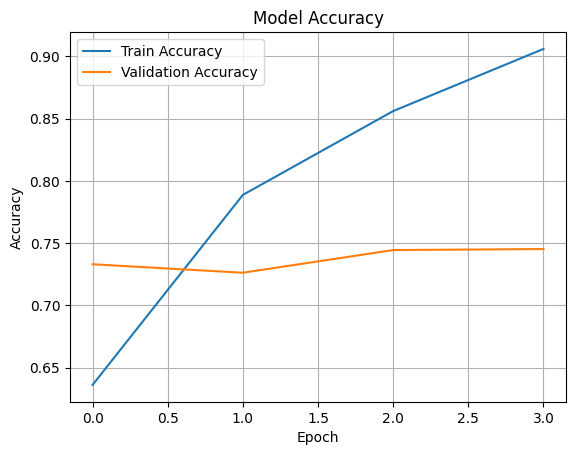

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

## Long Short-Term Memory (LSTM)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True,mode="min")

In [ ]:

SRNN_model = Sequential([
    Input(shape=(maxlen,)),
    Embedding(vocabulary_size, 256),
    LSTM(256, activation="relu"),

    Dense(128,activation="relu"),

    Dense(64, activation="relu"),

    Dense(32, activation="relu"),
    Dense(16, activation="relu"),



    Dense(len(le.classes_), activation="softmax")
])

SRNN_model.compile(
    optimizer=Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
SRNN_model.summary()

history = SRNN_model.fit(
    X_train_padded, Y_train_encoded,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_padded, Y_test_encoded),
    callbacks = [es]


)

loss, acc_lstm = SRNN_model.evaluate(X_test_padded, Y_test_encoded, verbose=0)
print("Test Accuracy:", acc_lstm)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, 300, 256)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,129,123 (11.94 MB)

 Trainable params: 3,129,123 (11.94 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - accuracy: 0.5593 - loss: 0.8803 - val_accuracy: 0.7243 - val_loss: 0.7168
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.7817 - loss: 0.5133 - val_accuracy: 0.7501 - val_loss: 0.6299
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 75ms/step - accuracy: 0.8301 - loss: 0.5541 - val_accuracy: 0.7591 - val_loss: 6269441.0000
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 23s 75ms/step - accuracy: 0.8633 - loss: 0.6384 - val_accuracy: 0.6928 - val_loss: 0.7124
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 75ms/step - accuracy: 0.8688 - loss: 0.4766 - val_accuracy: 0.7517 - val_loss: 675423.1875
Test Accuracy: 0.7501001358032227


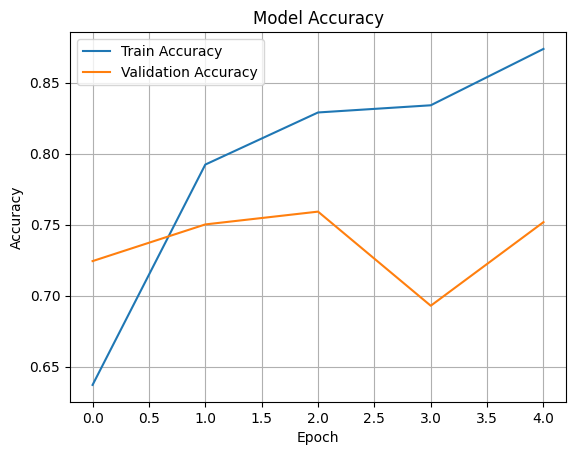

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# **Model Evaluation and Comparasion**

In [ ]:
model_accuracies = {
    'Bi-directional RNN': acc_brnn,
    'Gaussian Naive Bayes': accuracy_nb,
    'Random Forest': accuracy_rf,
    'K-Nearest Neighbors': accuracy_knn,
    'Simple RNN': acc_rnn,
    'LSTM': acc_lstm
}

print("Model Accuracies:")
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy:.4f}")

Model Accuracies:
Bi-directional RNN: 0.7201
Gaussian Naive Bayes: 0.6552
Random Forest: 0.7263
K-Nearest Neighbors: 0.6600
Simple RNN: 0.7331
LSTM: 0.7501


Visualizing the scores using a bar chart.


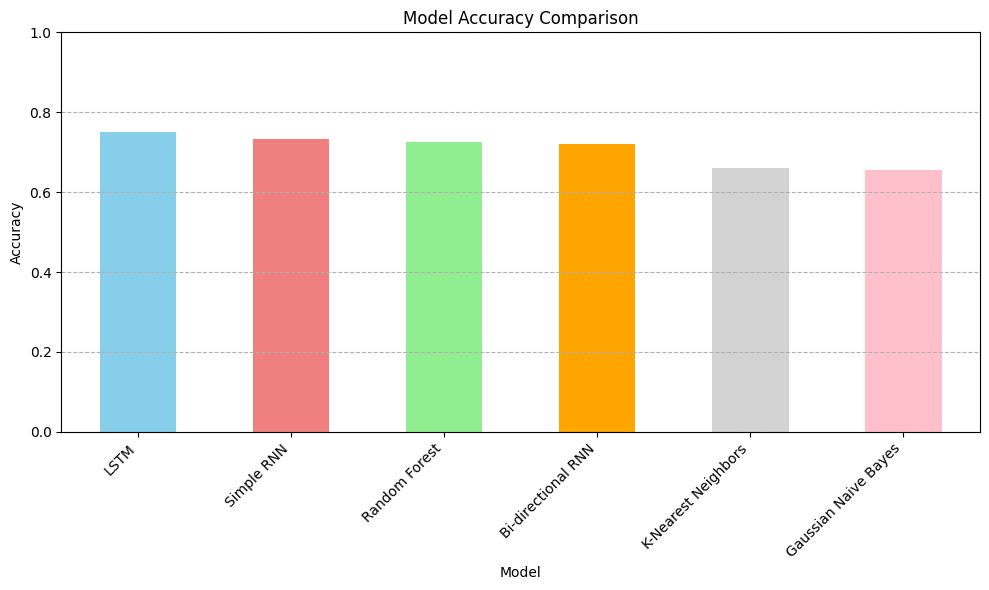

In [ ]:
import matplotlib.pyplot as plt

accuracies_series = pd.Series(model_accuracies)


plt.figure(figsize=(10, 6))
accuracies_series.sort_values(ascending=False).plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen', 'orange', 'lightgray', 'pink'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1) # Accuracy is between 0 and 1
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()


## Summary:

### Data Analysis Key Findings
*   The accuracy scores for the different models were successfully combined and are as follows: LSTM achieved the highest accuracy at 0.7501, followed by Simple RNN (0.7331), Random Forest (0.7263), Bi-directional RNN (0.7201), K-Nearest Neighbors (0.6600), and Gaussian Naive Bayes (0.6552).
*   LSTM and Simple RNN models demonstrated the best performance among the evaluated models, both achieving accuracies above 0.73.
*   Gaussian Naive Bayes and K-Nearest Neighbors models showed the lowest accuracies, performing significantly worse than the RNN-based models and Random Forest.
*   A bar chart was successfully generated, providing a clear visual comparison of the accuracy scores across all models.

